In [1]:
import pandas as pd
import numpy as np

#to plot the data
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
from sklearn.model_selection import KFold

# import rul.py 
from rul import prepare_data

In [2]:
# Input files don't have column names
dependent_var = ['RUL']
index_columns_names =  ["UnitNumber","Cycle"]
operational_settings_columns_names = ["OpSet"+str(i) for i in range(1,4)]
sensor_measure_columns_names =["SensorMeasure"+str(i) for i in range(1,22)]
input_file_column_names = index_columns_names + operational_settings_columns_names + sensor_measure_columns_names

In [3]:
df_train = pd.read_csv('train_FD001.txt',delim_whitespace=True,names=input_file_column_names)

rul = pd.DataFrame(df_train.groupby('UnitNumber')['Cycle'].max()).reset_index()
rul.columns = ['UnitNumber', 'max']
df_train = df_train.merge(rul, on=['UnitNumber'], how='left')
df_train['RUL'] = df_train['max'] - df_train['Cycle']
df_train.drop('max', axis=1, inplace=True)

df_train.head()

,UnitNumber,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [4]:
df_test = pd.read_csv('test_FD001.txt', delim_whitespace=True, names=input_file_column_names)
df_test.head()

,UnitNumber,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [5]:
y_true = pd.read_csv('RUL_FD001.txt',delim_whitespace=True,names=["RUL"])
y_true["UnitNumber"] = y_true.index
y_true.head()

,RUL,UnitNumber
0,112,0
1,98,1
2,69,2
3,82,3
4,91,4


In [6]:
# Filter UnitNumber == 1 
df_train_one = df_train[df_train["UnitNumber"] ==1]

In [7]:
df_train_one.shape

(192, 27)

In [8]:
temp_df = df_train[["UnitNumber","Cycle"]].groupby("UnitNumber").max()



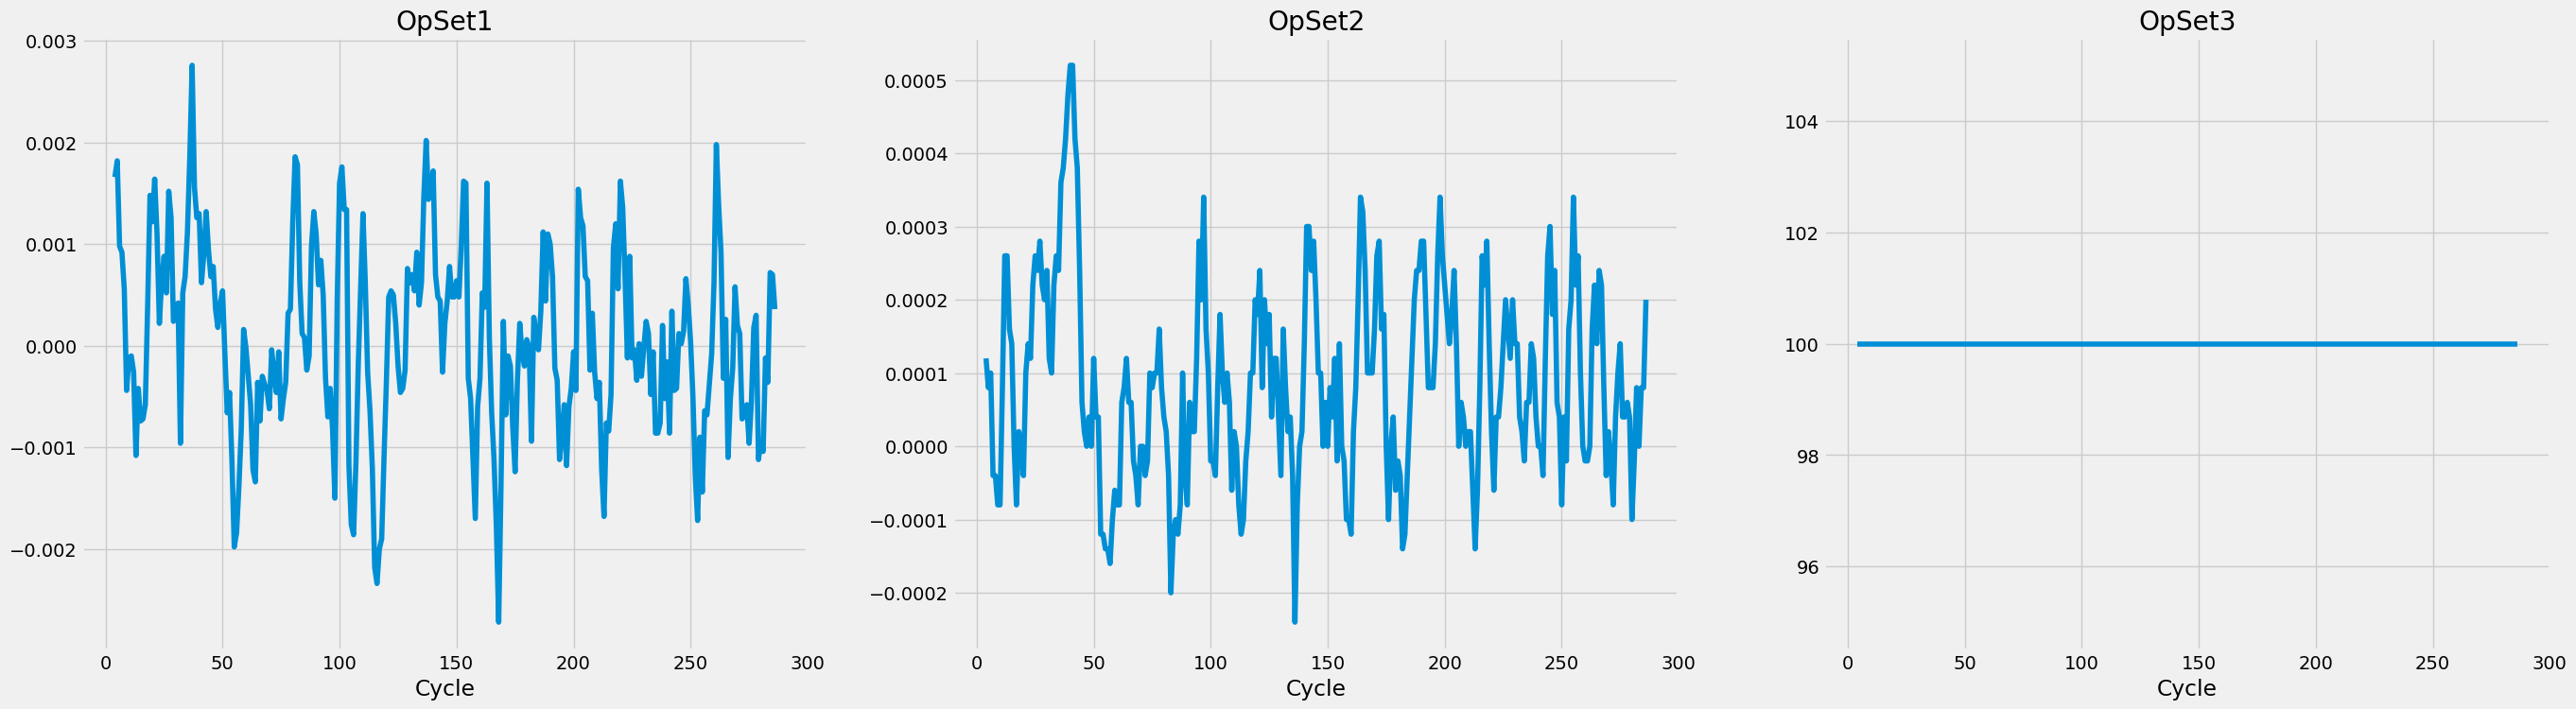

In [9]:
fig,ax=plt.subplots(1,3,figsize=(30,8), sharex='all')
for i in range(0,3):
    df_u1=df_train.query('UnitNumber==2').reset_index(drop = True)
    df_u1['rolling_avg'] = df_u1['OpSet'+str(i+1)].rolling(window = 5).mean()
    df_u1['rolling_avg'].plot(kind = "line", ax = ax[i])
    ax[i].set_title('OpSet'+str(i+1))
    ax[i].set_xlabel("Cycle")

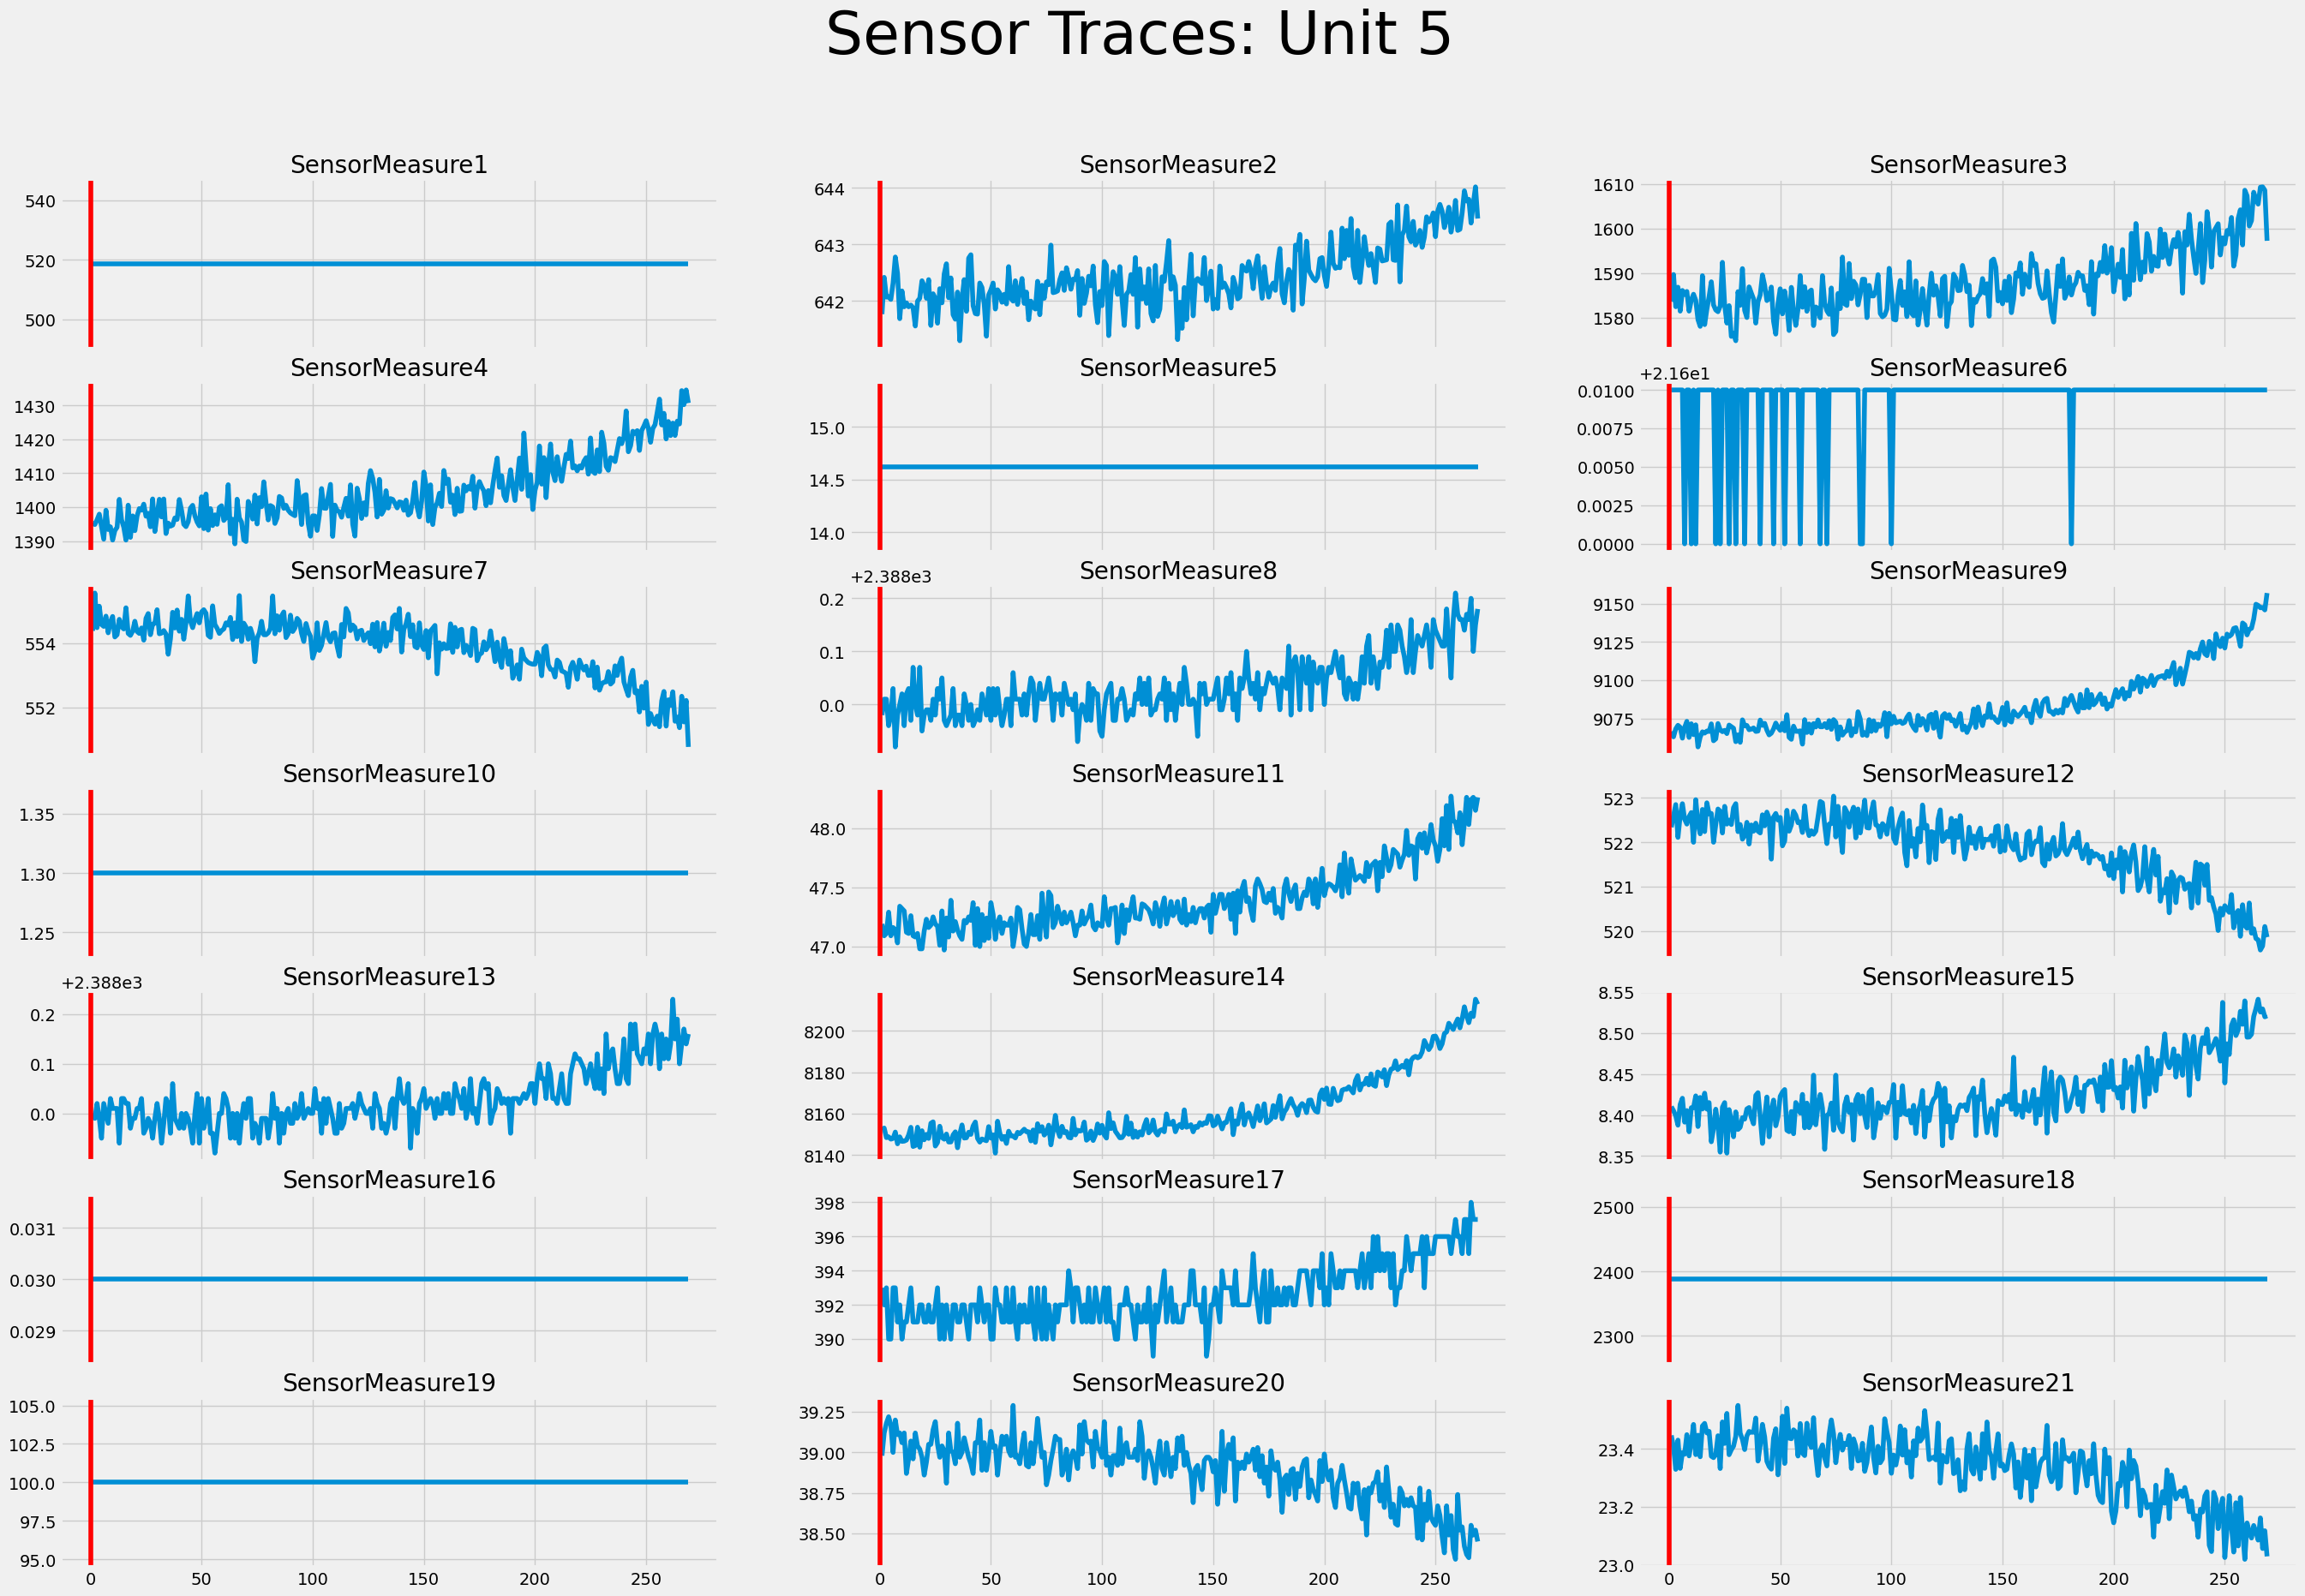

In [10]:
fig,ax=plt.subplots(7,3,figsize=(30,20),sharex=True)
df_u1=df_train.query('UnitNumber==5')
c=0
for i in range(0,7):
    for j in range(0,3):
        ax[i,j].plot(df_u1.Cycle.values, df_u1['SensorMeasure'+str(c+1)])
        ax[i,j].set_title('SensorMeasure'+str(c+1))
        ax[i,j].axvline(0,c='r')
        c+=1
plt.suptitle('Sensor Traces: Unit 5',fontsize=50)
plt.show()

In [11]:
temp_df = df_train.groupby('UnitNumber').std()
temp_df.head()

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL
UnitNumber,,,,,,,,,,,,,,,,,,,,,
1,55.569776,0.001953,0.000282,0.0,0.0,0.486795,5.759776,8.565610,0.0,0.000000,...,0.076960,5.563129,0.034125,0.0,1.475661,0.0,0.0,0.166998,0.105101,55.569776
2,82.993976,0.002320,0.000298,0.0,0.0,0.560214,6.596730,9.737248,0.0,0.002491,...,0.063861,8.683012,0.041128,0.0,1.647280,0.0,0.0,0.199332,0.114796,82.993976
3,51.816986,0.002145,0.000290,0.0,0.0,0.474190,6.386222,8.610126,0.0,0.001482,...,0.041219,29.439715,0.036620,0.0,1.570773,0.0,0.0,0.166112,0.104734,51.816986
4,54.703748,0.002033,0.000286,0.0,0.0,0.441446,6.109152,7.737463,0.0,0.000727,...,0.034819,30.691780,0.031947,0.0,1.602848,0.0,0.0,0.159302,0.093804,54.703748
5,77.797815,0.002119,0.000279,0.0,0.0,0.551542,7.060648,9.782341,0.0,0.002503,...,0.056445,16.480153,0.038658,0.0,1.740057,0.0,0.0,0.187133,0.112705,77.797815


In [12]:
# necessary features for analysis
not_required_feats = ["SensorMeasure1", "SensorMeasure5", "SensorMeasure6", "SensorMeasure10", 
                      "SensorMeasure16", "SensorMeasure18", "SensorMeasure19"]
feats = [feat for feat in sensor_measure_columns_names if feat not in not_required_feats]
feats

['SensorMeasure2',
 'SensorMeasure3',
 'SensorMeasure4',
 'SensorMeasure7',
 'SensorMeasure8',
 'SensorMeasure9',
 'SensorMeasure11',
 'SensorMeasure12',
 'SensorMeasure13',
 'SensorMeasure14',
 'SensorMeasure15',
 'SensorMeasure17',
 'SensorMeasure20',
 'SensorMeasure21']

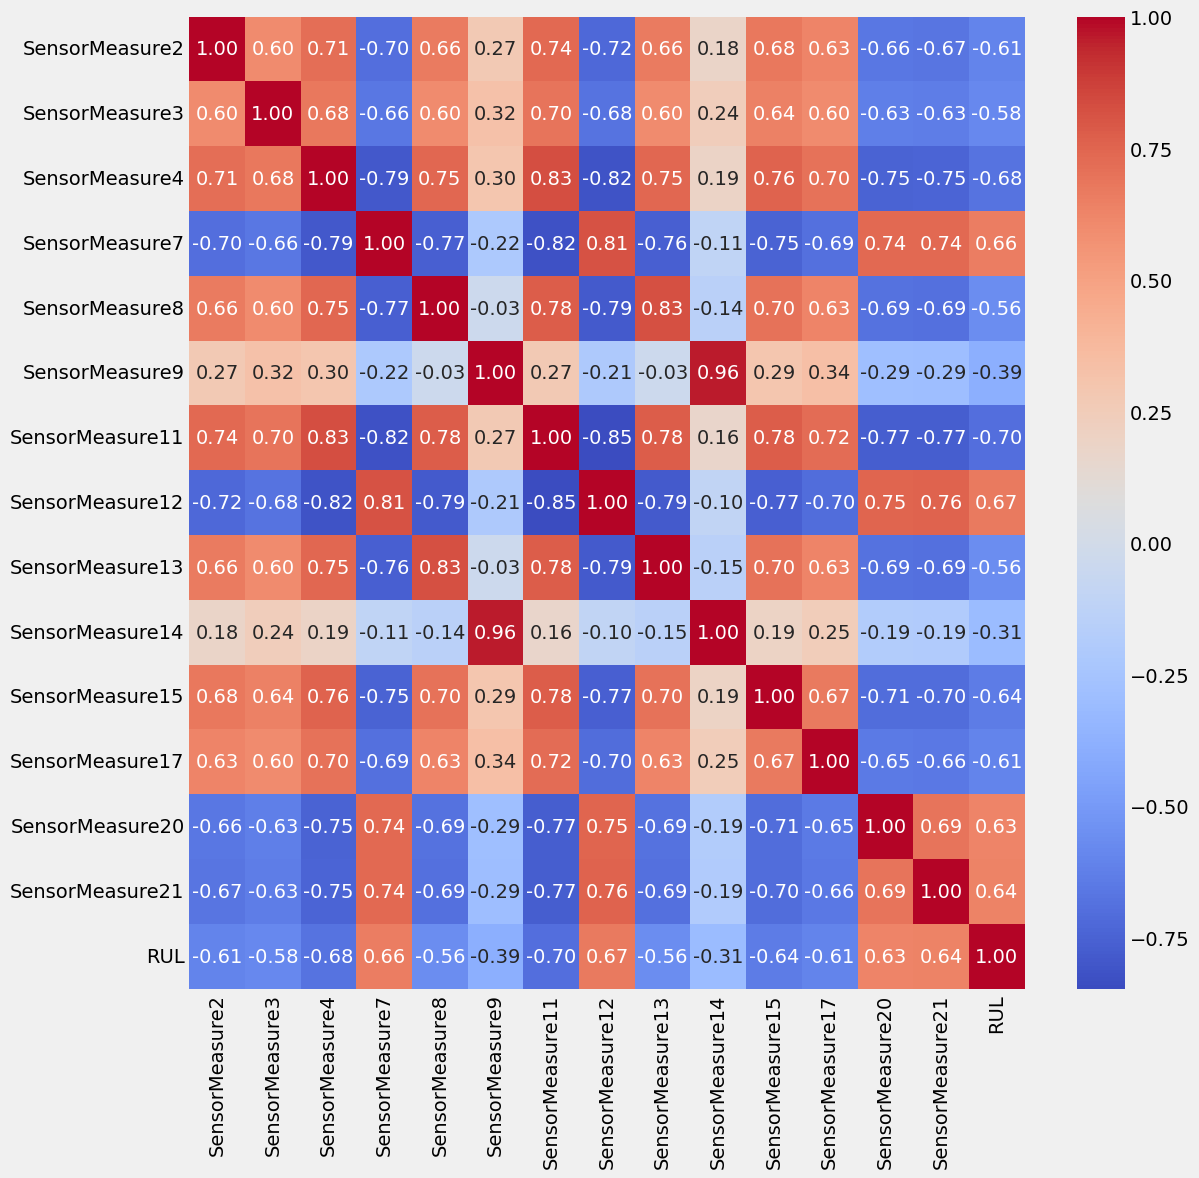

In [13]:
corr = df_train[feats + ["RUL"]].corr()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax = sns.heatmap(corr, annot=True, cmap = "coolwarm", fmt=".2f")

In [14]:
feats = [i for i in feats if "SensorMeasure14" not in i]
feats

['SensorMeasure2',
 'SensorMeasure3',
 'SensorMeasure4',
 'SensorMeasure7',
 'SensorMeasure8',
 'SensorMeasure9',
 'SensorMeasure11',
 'SensorMeasure12',
 'SensorMeasure13',
 'SensorMeasure15',
 'SensorMeasure17',
 'SensorMeasure20',
 'SensorMeasure21']

In [15]:
group_df = df_train[(df_train.UnitNumber <= 10) & (df_train.RUL <= 50)].groupby('UnitNumber', as_index = False).\
    apply(lambda x: x.reset_index(drop = True)).reset_index()
group_df.head()

,level_0,level_1,UnitNumber,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL
0,0,0,1,142,0.0026,0.0002,100.0,518.67,642.51,1595.29,...,2388.18,8124.87,8.4291,0.03,392,2388,100.0,38.71,23.2816,50
1,0,1,1,143,-0.0005,-0.0003,100.0,518.67,642.77,1593.10,...,2388.11,8126.81,8.4419,0.03,393,2388,100.0,38.79,23.2305,49
2,0,2,1,144,0.0025,-0.0004,100.0,518.67,643.09,1591.89,...,2388.17,8125.47,8.4601,0.03,393,2388,100.0,38.75,23.2249,48
3,0,3,1,145,-0.0004,-0.0001,100.0,518.67,642.95,1594.92,...,2388.15,8130.91,8.4644,0.03,395,2388,100.0,38.67,23.1490,47
4,0,4,1,146,0.0002,-0.0003,100.0,518.67,642.72,1586.75,...,2388.12,8129.19,8.4312,0.03,392,2388,100.0,38.69,23.3233,46
